### A tour of machine learning classifiers using scikit-learn 

In [1]:
from sklearn import datasets
import numpy as np

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, [2, 3]]
y = iris.target

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
print('Label counts in y: ', np.bincount(y))
print('Label count in y_train: ', np.bincount(y_train))
print('Label count in y_test: ', np.bincount(y_test))

Label counts in y:  [50 50 50]
Label count in y_train:  [34 32 39]
Label count in y_test:  [16 18 11]


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter = 40, eta0 = 0.01, random_state = 0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples %d'% (y_test != y_pred).sum())

Misclassified samples 4


In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy %.2f'% accuracy_score(y_test, y_pred))

Accuracy 0.91


In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [22]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                   alpha = 0.8, c = cmap(idx),
                   marker = markers[idx], label = cl,
                   edgecolors = 'black')
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c = '',
                   alpha = 1.0, linewidths = 1, marker = 'o',
                   s = 55, label = 'test set', edgecolors = 'black')

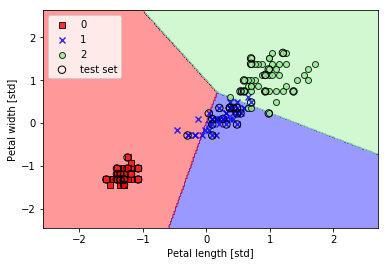

In [23]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std,
                     y = y_combined,
                     classifier = ppn,
                     test_idx = range(105, 150))
plt.xlabel('Petal length [std]')
plt.ylabel('Petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

### Implementing Logistic Regression

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [26]:
z = np.arange(-7, 7, 0.1)

In [27]:
phi_z = sigmoid(z)

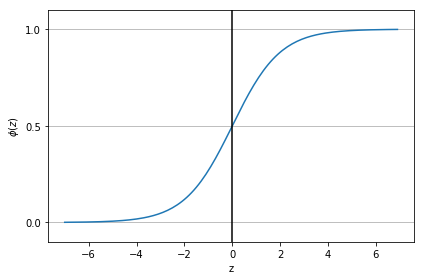

In [29]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

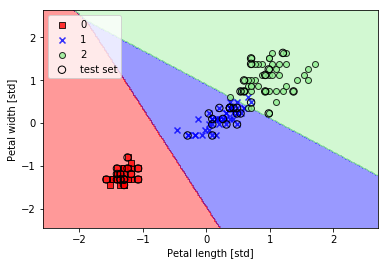

In [32]:
plot_decision_regions(X_combined_std,
                     y_combined, 
                     classifier = lr,
                     test_idx = range(105, 150))
plt.xlabel('Petal length [std]')
plt.ylabel('Petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

In [33]:
y_pred = lr.predict(X_test_std)
accuracy_score(y_test, y_pred)

0.9777777777777777

#### predict_proba returns the probability of the passed sample belonging to the different classes.<br />predict_proba() expects 2D array as input

In [41]:
lr.predict_proba([X_test_std[0, :]])

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01]])

In [42]:
y_test[0]

2

In [43]:
lr.predict_proba(X_test_std[:3, :])

array([[2.05743774e-11, 6.31620264e-02, 9.36837974e-01],
       [6.08753106e-04, 9.99285569e-01, 1.05678028e-04],
       [8.16962653e-01, 1.83037347e-01, 6.48299403e-14]])

In [46]:
y_test[:3]

array([2, 1, 0])

In [51]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10. ** c, random_state = 0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10. ** c)

In [52]:
weights = np.array(weights)

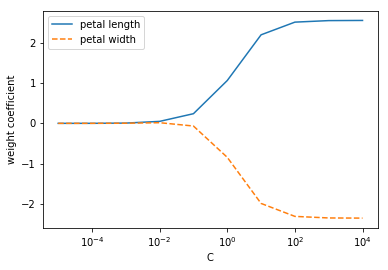

In [53]:
plt.plot(params, weights[:, 0], label = 'petal length')
plt.plot(params, weights[:, 1], linestyle = '--', label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

### Implementing support vector machines with scikit-learn 

In [54]:
from sklearn.svm import SVC

In [55]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

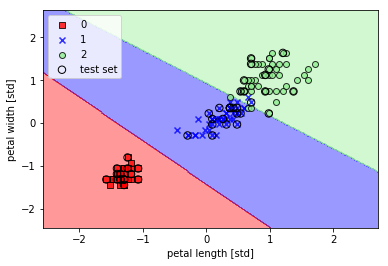

In [56]:
plot_decision_regions(X_combined_std, 
                     y_combined,
                     classifier = svm,
                     test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()

##### Solving non-linear problems using kernel SVM 

In [58]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, -1, 1)

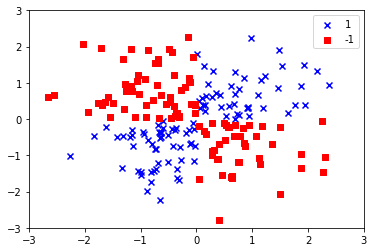

In [60]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c = 'r', marker = 's', label = '-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [61]:
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.1, C = 10)
svm.fit(X_xor, y_xor)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

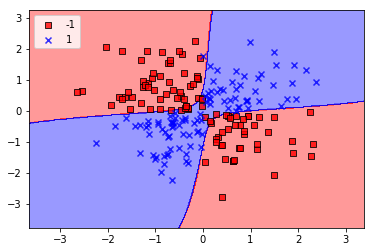

In [62]:
plot_decision_regions(X_xor, y_xor, classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

In [76]:
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 100, C = 1)
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

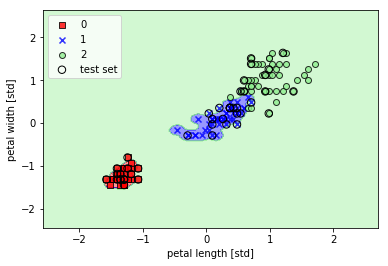

In [77]:
plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier = svm,
                     test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()